# CSC635_HW1_Sujung Choi

1.	Load the data in a DataFrame (DF) named tips. Assume all files are in the same folder as your python notebook. 

In [2]:
import pandas as pd
data_filename = 'tips.csv'
tips = pd.read_csv(data_filename)

2.	Find the names of the columns.  

In [3]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

3.	Rename the columns “time” as “meal” and “size” as “party size”. 

In [4]:
tips.rename(columns = {'time':'meal', 'size':'party size'}, inplace = True)
tips.head(0)

,total_bill,tip,sex,smoker,day,meal,party size


4.	Use the head function to view parts of the data. 

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,meal,party size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


5.	Retrieve the information in the second and third rows using two different methods (you can use .loc, .iloc, or the slicing notation, :).

In [6]:
tips.iloc[1:3]
tips.loc[1:2]

,total_bill,tip,sex,smoker,day,meal,party size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


6.	Retrieve the information in the first and second columns (i.e., under total_bill and tip). Use the head function to display the first three rows under these two columns.

In [7]:
tips[['total_bill', 'tip']].head(3)

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50


7.	Get the information stored in the cell at the intersection of the second row and third column. I.e., what is the sex of the customer (that paid for the meal) that is stored in the second row of the DF? 

In [8]:
tips.iloc[1,2]

'Male'

8.	Find the number of observations in the dataset.  

In [9]:
tips.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
meal          244
party size    244
dtype: int64

9. Use the describe function to get basic statistics about the numerical attributes.

In [10]:
tips.describe()

,total_bill,tip,party size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


10.	Use the describe function to get basic statistics about all attributes. It is okay to have the value NaN shown in some places. 

In [11]:
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,meal,party size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


11.	Find the average tip amount. 

In [12]:
tip_amount = tips.tip
tip_amount.mean()

2.99827868852459

12.	Get basic statistics about the tip column using the describe function. This helps give an idea about the min, max, median values of tip in addition to other basic statistics.

In [13]:
tip_amount.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

13.	Draw a boxplot of the tip column. This gives a visual representation of the tips data and shows outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x10cb3cb3b10>,
 'caps': [<matplotlib.lines.Line2D at 0x10cb3f22c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x10cb3e45510>],
 'medians': [<matplotlib.lines.Line2D at 0x10cb3f61250>],
 'fliers': [<matplotlib.lines.Line2D at 0x10cb3f57550>],
 'means': []}

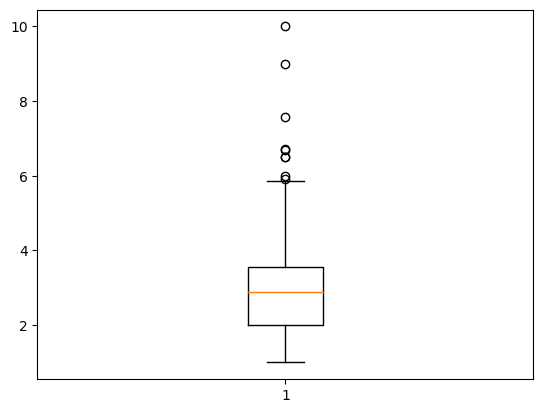

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.boxplot(tip_amount)

14.	From the boxplot, it looks that the outliers are for tips >= 6. Retrieve the rows where the tip amount is >= 6.  


In [15]:
tip_amount.loc[tip_amount >= 6]

23      7.58
47      6.00
59      6.73
141     6.70
170    10.00
183     6.50
212     9.00
214     6.50
Name: tip, dtype: float64

Q1. How much tip do customers usually give on average? 
A1. from the above result, we can see on average customers tip about $3 (i.e., $2.99827868852459).

15.	Use the groupby function to find the average tip amount per sex. i.e., find the average tip by male customers and the average tip by female customers. 

In [16]:
grouped = tips['tip'].groupby(tips['sex'])
grouped.mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

16.	Create a DF named males that contains the male samples in the tips DF. Then, call males.sample(10) to draw a random sample of 10 male observations.

In [17]:
males = tips.loc[tips.sex=='Male']
males.sample(10)

,total_bill,tip,sex,smoker,day,meal,party size
41,17.46,2.54,Male,No,Sun,Dinner,2
97,12.03,1.50,Male,Yes,Fri,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
177,14.48,2.00,Male,Yes,Sun,Dinner,2
185,20.69,5.00,Male,No,Sun,Dinner,5
207,38.73,3.00,Male,Yes,Sat,Dinner,4
42,13.94,3.06,Male,No,Sun,Dinner,2
184,40.55,3.00,Male,Yes,Sun,Dinner,2
89,21.16,3.00,Male,No,Thur,Lunch,2
28,21.70,4.30,Male,No,Sat,Dinner,2


17.	Create a DF named females that contains the female samples in the tips DF. Then, call females.sample(frac=0.1, replace = True) to generate and display a random sample with replacement that consists of 10% of the size of the females DF.  

In [18]:
females = tips.loc[tips.sex=='Female']
females.sample(frac=0.1, replace = True)

,total_bill,tip,sex,smoker,day,meal,party size
111,7.25,1.00,Female,No,Sat,Dinner,1
186,20.90,3.50,Female,Yes,Sun,Dinner,3
124,12.48,2.52,Female,No,Thur,Lunch,2
103,22.42,3.48,Female,Yes,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2
178,9.60,4.00,Female,Yes,Sun,Dinner,2
157,25.00,3.75,Female,No,Sun,Dinner,4
73,25.28,5.00,Female,Yes,Sat,Dinner,2
168,10.59,1.61,Female,Yes,Sat,Dinner,2


18.	Write code to find out the number of male customers and the number of female customers.

In [19]:
num_males = len(males)
num_females = len(females)
print("number of male customers: ", num_males, 
      "\nnumber of female customers: ", num_females)

number of male customers:  157 
number of female customers:  87


19.	Create a bar chart comparing the number of males and number of females in the dataset. Give labels to the x-axis, y-axis, and a title to the plot.

Text(0, 0.5, 'Number of Customers')

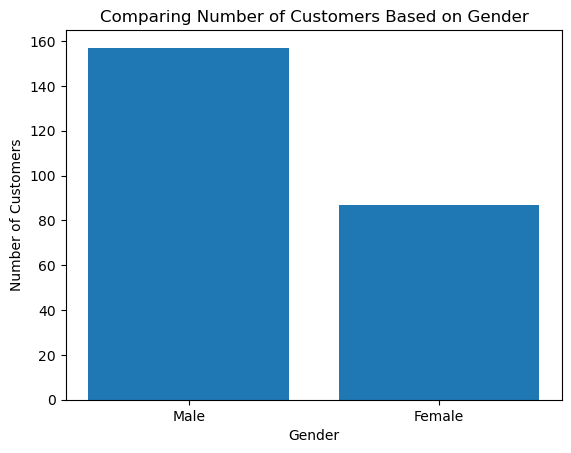

In [20]:
gender = ['Male', 'Female']
num_customers = [num_males, num_females]
plt.bar(gender, num_customers)
plt.title('Comparing Number of Customers Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')

20.	Draw a scatter plot of the tips given by male customers and a scatter plot of the tips given by female customers.

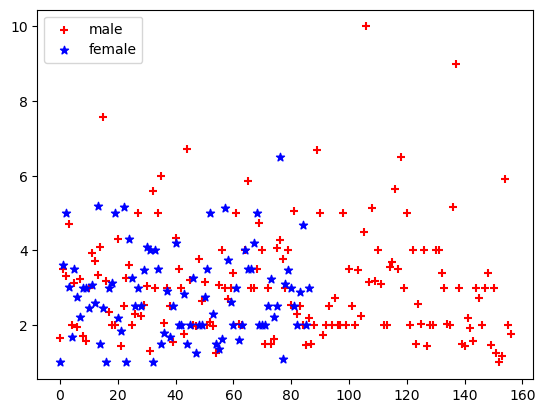

In [21]:
x1 = np.arange(0, num_males)
plt.scatter(x1, males['tip'], label = 'male', color = "r", marker = "+")
x2 = np.arange(0, num_females)
plt.scatter(x2, females['tip'], label = 'female', color = 'b', marker = '*')
plt.legend(loc='upper left')

21.	 Draw two box plots to show tips per sex. One box plot to show the tips by females while the other to shows tips by males. Show both plots in the same area.

Text(0, 0.5, 'Tip')

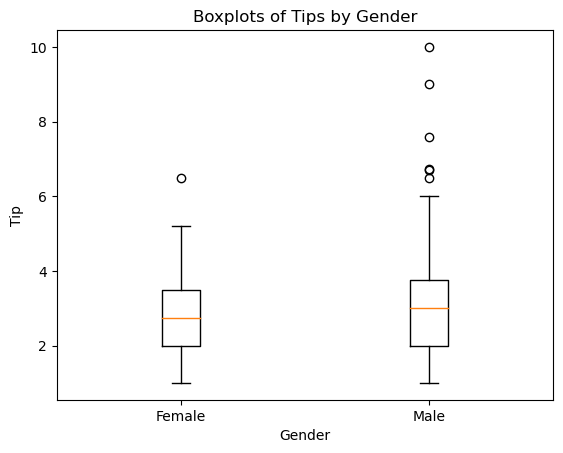

In [22]:
tip_by_gender = [females.tip, males.tip]
plt.boxplot(tip_by_gender, labels = ['Female', 'Male'])
plt.title('Boxplots of Tips by Gender')
plt.xlabel('Gender')
plt.ylabel('Tip')

In [23]:
males.tip.loc[tip_amount >= 6]


23      7.58
47      6.00
59      6.73
141     6.70
170    10.00
183     6.50
212     9.00
Name: tip, dtype: float64

### Q2. Do male customers usually give more tip than female customers? 

### A2. Yes, on average, female customers tip about 2.83 dollars whereas male customers tip about 3.09 dollars. However, there are more outliers in male customers, meaning they would impact increasing the average tip amount of male customers.

22.	Apply the describe function on the “day” column of the tips DF and observe the result.

In [24]:
tips.day.describe()

count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object

23.	Use the groupby function to form groups based on the days of the week. The result of this shows the number of customers that were served every day. 

In [25]:
tips.groupby(tips['day']).count()


,total_bill,tip,sex,smoker,meal,party size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


24.	Write code to find the number of customers served every day. Store the result in variable(s).

In [26]:
num_per_day = tips['day'].groupby(tips['day']).count()
num_per_day #this print the number of customers for each day

#store the results for each day in variables
num_thur = num_per_day.loc['Thur']
num_fri = num_per_day.loc['Fri']
num_sat = num_per_day.loc['Sat']
num_sun = num_per_day.loc['Sun']

25.	Draw a line plot that shows number of customers served every day. 

Text(0, 0.5, 'Number of Customers')

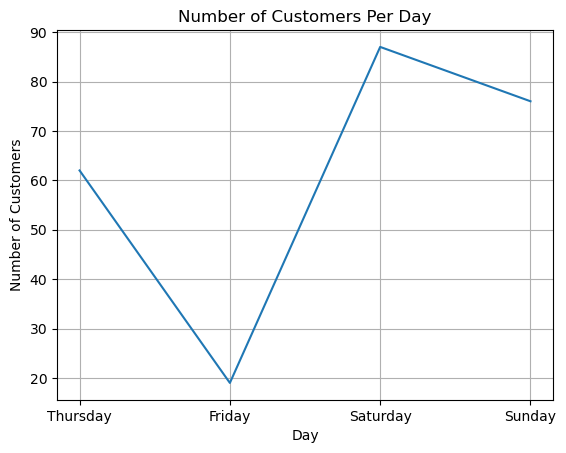

In [27]:
x = np.arange(0, len(num_per_day))
pd.data = [num_thur, num_fri, num_sat, num_sun]
plt.plot(x, pd.data)
plt.xticks([0.0,1.0,2.0,3.0],["Thursday",'Friday',"Saturday","Sunday"])
plt.grid(True)
plt.title('Number of Customers Per Day')
plt.xlabel('Day')
plt.ylabel('Number of Customers')

Q3. What day(s) of the week is the restaurant the busiest?
A3. Saturday is the busiest day for the restaurant, followed by Sunday as the second busiest day.

26.	Use the groupby function to find the average tip per day. Store these averages in variables. These variables will be used next to display the averages in plots. 

In [28]:
avg_tip_per_day = tips['tip'].groupby(tips['day']).mean()
avg_tip_per_day #this print the average tip per day

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

In [29]:
#store the results for each day in variables
thur_tip = avg_tip_per_day.loc['Thur']
fri_tip = avg_tip_per_day.loc['Fri']
sat_tip = avg_tip_per_day.loc['Sat']
sun_tip = avg_tip_per_day.loc['Sun']

27.	Draw a figure with 2 by 2 subplots. Each subplot shows a line plot of the tips given on a certain day. Show the average tip in each subplot. 

In [30]:
tips['number'] = np.arange(0, len(tips.index))

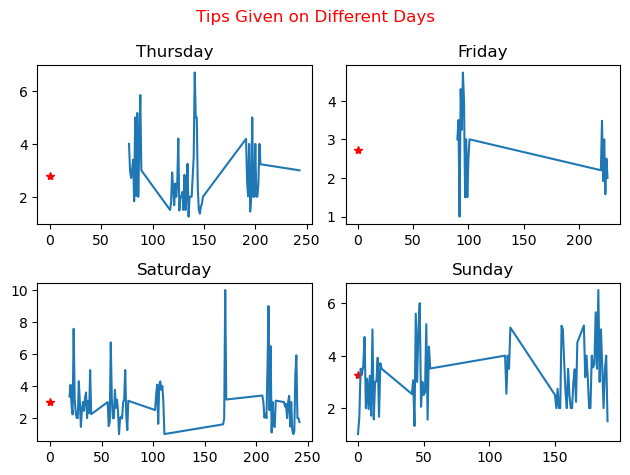

<Figure size 800x800 with 0 Axes>

In [31]:
tips_1 = tips[tips['day']=='Thur']
tips_2 = tips[tips['day']=='Fri']
tips_3 = tips[tips['day']=='Sat']
tips_4 = tips[tips['day']=='Sun']
fig = plt.figure()

axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

axes1.plot(0, thur_tip, 'r*')
axes2.plot(0, fri_tip, 'r*')
axes3.plot(0, sat_tip, 'r*')
axes4.plot(0, sun_tip, 'r*')

axes1.plot(tips_1['number'], tips_1['tip'])
axes2.plot(tips_2['number'], tips_2['tip'])
axes3.plot(tips_3['number'], tips_3['tip'])
axes4.plot(tips_4['number'], tips_4['tip'])
plt.figure(figsize=(8, 8))

axes1.set_title("Thursday")
axes2.set_title("Friday")
axes3.set_title("Saturday")
axes4.set_title("Sunday")

fig.suptitle("Tips Given on Different Days", color="red")

fig.tight_layout()

28.	Draw a pie chart to compare the total tip amounts collected on the different days.

([<matplotlib.patches.Wedge at 0x10cb5b33e90>,
 [Text(1.0727306693142526, 0.24341099217700865, 'Fri'),
  Text(0.0069438104089625365, 1.09997808318939, 'Sat'),
  Text(-0.905707335693233, -0.62425493355797, 'Sun'),
  Text(0.8138842536869884, -0.739994879441996, 'Thur')],
 [Text(0.5851258196259559, 0.13276963209655016, '7.10%'),
  Text(0.0037875329503432014, 0.5999880453760308, '35.59%'),
  Text(-0.4940221831053998, -0.34050269103162, '33.82%'),
  Text(0.44393686564744816, -0.40363357060472504, '23.49%')])

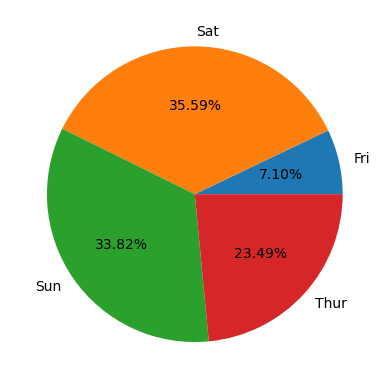

In [32]:
sum_tips = tips['tip'].groupby(tips['day']).sum()
labels = ["Fri", "Sat", "Sun", "Thur"]
plt.pie(sum_tips, labels = labels, autopct = '%0.2f%%', aspect = 'equal')

### Q4. Do customers tend to give more tips on certain days?

### A4. Yes, customers, on average, give more tips on Sunday (approximately 3.26 dolloars), followed by Saturday (approximately 2.99 dollars). 
### They are higher than the tips on Friday (approximately 2.74 dollars) and Thursday (approximately 2.77 dollars).